## House Price Prediction using Linear Regression

#### Required Libraries

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
from numpy.linalg import inv

#### Importing Data

In [2]:
inputData = pd.read_csv('Housing Price data sets.csv', index_col=0)
inputData[:5]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


#### Organizing the data

In [3]:
inputData.driveway.replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
inputData.recroom.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.fullbase.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.gashw.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.airco.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
inputData.prefarea.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
x = inputData.drop(['price'], axis = 1)
x = numpy.array(x)

In [4]:
y = inputData['price']
y = numpy.array(y)

In [5]:
x[:5]

array([[5850,    3,    1,    2,    1,    0,    1,    0,    0,    1,    0],
       [4000,    2,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [3060,    3,    1,    1,    1,    0,    0,    0,    0,    0,    0],
       [6650,    3,    1,    2,    1,    1,    0,    0,    0,    0,    0],
       [6360,    2,    1,    1,    1,    0,    0,    0,    0,    0,    0]])

In [6]:
y[:5]

array([42000., 38500., 49500., 60500., 61000.])

In [7]:
y = y.reshape(546, 1)
print(y.shape)
print(x.shape)

(546, 1)
(546, 11)


#### Cost Function

In [8]:
def cost(x, y, w):
    m = x.shape[0]
    ans = (numpy.sum(numpy.square(numpy.matmul(x, w) - y)))/(2*m)
    return ans

In [9]:
x = numpy.c_[numpy.ones(x.shape[0]),numpy.array(x)]
print(x.shape)

(546, 12)


### Finding the Regression Parameters without Normalization

#### Using the normal Equation

In [10]:
xT = x.transpose()
xinv = inv(numpy.matmul(xT, x))
xy = numpy.matmul(xT, y)
w = numpy.matmul(xinv, xy)
print(w)

[[-4.03835043e+03]
 [ 3.54630297e+00]
 [ 1.83200347e+03]
 [ 1.43355585e+04]
 [ 6.55694571e+03]
 [ 6.68777889e+03]
 [ 4.51128383e+03]
 [ 5.45238554e+03]
 [ 1.28314063e+04]
 [ 1.26328904e+04]
 [ 4.24482900e+03]
 [ 9.36951324e+03]]


In [11]:
print(cost(x, y, w))

116323325.68174727


#### Using Gradient Descent Algorithm

In [12]:
def calcdj(x, y, w):
    m = x.shape[0]
#     print(x.shape)
    ans = (numpy.matmul(x.transpose(), (numpy.matmul(x, w) - y)))/(m)
    return ans

In [13]:
print(x.shape)

(546, 12)


In [14]:
W = numpy.random.randn(12, 1)
W = numpy.array(W)
print(W)

[[-0.37197215]
 [ 0.6344292 ]
 [ 0.08744563]
 [-1.7229559 ]
 [-0.75494276]
 [-1.32303478]
 [-0.40696655]
 [-0.39742977]
 [ 1.25313431]
 [ 0.42589908]
 [-0.87343488]
 [-0.74700137]]


In [15]:
print(x.shape)

(546, 12)


In [16]:
totalRep = 100
curRep= 0
learningRate = 0.1
costs = numpy.empty([totalRep])
while curRep < totalRep:
    curCost = cost(x, y, W)
    dj = calcdj(x, y, W)
    W = W - learningRate * dj
    costs[curRep] = curCost
    curRep = curRep + 1

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/root/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


In [17]:
print(W)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [18]:
print(cost(x, y, W))

nan


### Finding the Regression Parameters with Normalization

In [19]:
def normalise(inp):
    return numpy.array((inp-inp.mean())/inp.std())

In [20]:
x = x[:, 1:]
normx = normalise(x)
normy = normalise(y)

In [21]:
normx = numpy.c_[numpy.ones(normx.shape[0]),numpy.array(normx)]

In [22]:
normx[:5]

array([[ 1.        ,  3.32566332, -0.28800578, -0.28924186, -0.28862382,
        -0.28924186, -0.2898599 , -0.28924186, -0.2898599 , -0.2898599 ,
        -0.28924186, -0.2898599 ],
       [ 1.        ,  2.18229273, -0.28862382, -0.28924186, -0.28924186,
        -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ],
       [ 1.        ,  1.60133687, -0.28800578, -0.28924186, -0.28924186,
        -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ],
       [ 1.        ,  3.82009385, -0.28800578, -0.28924186, -0.28862382,
        -0.28924186, -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ],
       [ 1.        ,  3.64086278, -0.28862382, -0.28924186, -0.28924186,
        -0.28924186, -0.2898599 , -0.2898599 , -0.2898599 , -0.2898599 ,
        -0.2898599 , -0.2898599 ]])

#### Using normal Equation

In [23]:
normxT = normx.transpose()
normxinv = inv(numpy.matmul(normxT, normx))
normxy = numpy.matmul(normxT, normy)
normw = numpy.matmul(normxinv, normxy)
print(normw)

[[1.37658095e+03]
 [2.15081916e-01]
 [1.11110315e+02]
 [8.69446180e+02]
 [3.97676252e+02]
 [4.05611325e+02]
 [2.73607675e+02]
 [3.30685115e+02]
 [7.78220072e+02]
 [7.66180033e+02]
 [2.57447260e+02]
 [5.68257433e+02]]


In [24]:
print(cost(normx, normy, normw))

0.16343818967927506


#### Using Gradient Descent Equation

In [25]:
normW = numpy.random.randn(12, 1)
normW = numpy.array(normW)
print(normW)

[[ 0.64010161]
 [ 0.0269776 ]
 [-0.49672543]
 [ 0.94967282]
 [-0.97258437]
 [ 0.6023901 ]
 [ 0.44219133]
 [ 0.83299162]
 [ 1.57200112]
 [ 1.47095096]
 [ 1.03435952]
 [ 0.57137846]]


In [26]:
totalRep = 1000
curRep= 0
learningRate = 0.001
costs = numpy.empty([totalRep])
while curRep < totalRep:
    curCost = cost(normx, normy, normW)
    dj = calcdj(normx, normy, normW)
    normW = normW - learningRate * dj
    costs[curRep] = curCost
    curRep = curRep + 1

In [27]:
print(normW)

[[ 0.7007058 ]
 [ 0.35093252]
 [-0.51404352]
 [ 0.93228888]
 [-0.98987642]
 [ 0.58489305]
 [ 0.42467735]
 [ 0.81548681]
 [ 1.55444858]
 [ 1.45349928]
 [ 1.01694257]
 [ 0.55388051]]


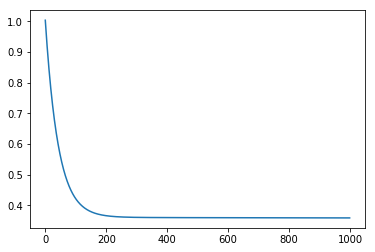

In [28]:
plt.plot(range(totalRep), costs)

In [29]:
print(cost(normx, normy, normW))

0.35872062753284384
